## Welcome to ZoeDepth Colab notebook

This notebook provides an easy to use interface for the depth estimation model "ZoeDepth".

It accompanies our paper : [ZoeDepth: Zero-shot Transfer by Combining Relative and Metric Depth](https://arxiv.org/abs/2302.12288v1)

# Setup

In [1]:
!pip install --upgrade timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!git clone https://github.com/isl-org/ZoeDepth.git

fatal: destination path 'ZoeDepth' already exists and is not an empty directory.


In [3]:
cd ZoeDepth

/content/ZoeDepth


Sanity checks, to make sure everything is working

In [4]:
!python sanity.py

Downloading: "https://github.com/intel-isl/MiDaS/zipball/master" to /root/.cache/torch/hub/master.zip
******************** Testing zoedepth ********************
Config:
{'attractor_alpha': 1000,
 'attractor_gamma': 2,
 'attractor_kind': 'mean',
 'attractor_type': 'inv',
 'aug': True,
 'bin_centers_type': 'softplus',
 'bin_embedding_dim': 128,
 'clip_grad': 0.1,
 'dataset': 'nyu',
 'distributed': True,
 'force_keep_ar': True,
 'gpu': None,
 'img_size': [384, 512],
 'inverse_midas': False,
 'log_images_every': 0.1,
 'max_temp': 50.0,
 'max_translation': 100,
 'memory_efficient': True,
 'midas_model_type': 'DPT_BEiT_L_384',
 'min_temp': 0.0212,
 'model': 'zoedepth',
 'n_attractors': [16, 8, 4, 1],
 'n_bins': 64,
 'name': 'ZoeDepth',
 'notes': '',
 'output_distribution': 'logbinomial',
 'prefetch': False,
 'pretrained_resource': 'url::https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_N.pt',
 'print_losses': False,
 'project': 'ZoeDepth',
 'random_crop': False,
 'random_tr

In [5]:
# Download file, only works on Chrome
from google.colab import files
files.download("pred.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Load the model

In [6]:
import torch
from zoedepth.utils.misc import get_image_from_url, colorize
from PIL import Image
import matplotlib.pyplot as plt


zoe = torch.hub.load(".", "ZoeD_N", source="local", pretrained=True)

img_size [384, 512]


Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Params passed to Resize transform:
	width:  512
	height:  384
	resize_target:  True
	keep_aspect_ratio:  True
	ensure_multiple_of:  32
	resize_method:  minimal
Using pretrained resource url::https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_N.pt
Loaded successfully


In [7]:
zoe = zoe.to('cuda')

# Prediction

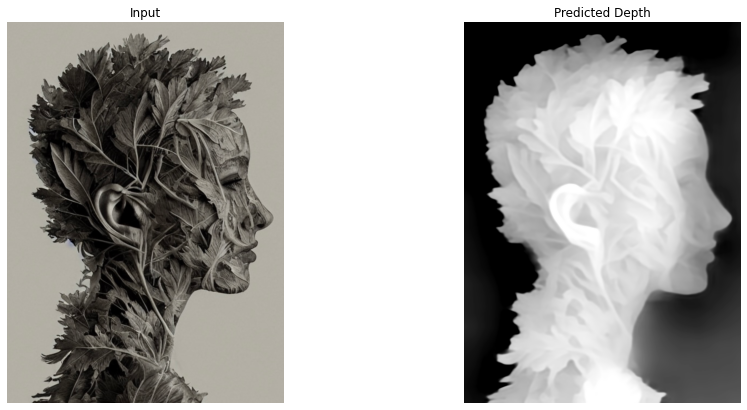

In [9]:
#@title Predicting depth from a url image
img_url = "http://static1.squarespace.com/static/6213c340453c3f502425776e/62f2452bc121595f4d87c713/62f3c63c5eec2b12a333f851/1661442296756/Screenshot+2022-08-10+at+15.55.27.png?format=1500w" #@param {type:"string"}
img = get_image_from_url(img_url)
depth = zoe.infer_pil(img)


colored_depth = colorize(depth)
fig, axs = plt.subplots(1,2, figsize=(15,7))
for ax, im, title in zip(axs, [img, colored_depth], ['Input', 'Predicted Depth']):
  ax.imshow(im)
  ax.axis('off')
  ax.set_title(title)